# Make the raw CSVs into a dataset

In [ ]:
# imports
import pandas as pd
import numpy as np
import os
import scipy
from scipy import stats
import matplotlib.pyplot as plt

Flow for generation of dataset

1. Generate average IgE standard curve per batch
2. Scale each membrane up to the average PBS value
3. Minus each membrane by the batch blank
4. Minus the absorbance value of each membrane by the respective blank (if we already minus by the batch blank, do we even still need to minus by the respective blank?)
5. Approximate sIgE level from absorbance based on average IgE standard curve
6. Create final dataset

## 1. Generate average IgE standard curve and average PBS

- Get the average of all the different IgE standards
- Get the average of all the PBS
- Minus the PBS value from all the IgE standards
- Plot log curve

In [ ]:
# Set directory of batch
batch_directory = "150222-CSV"

panel1 = pd.read_csv("First Stage Combine/" + batch_directory + "/1-combine.csv")
panel2 = pd.read_csv("First Stage Combine/" + batch_directory + "/2-combine.csv")

# Get the IgE values
panel1_ige = panel1.iloc[:,9:18]
panel2_ige = panel2.iloc[:,9:18]
combine_ige = pd.concat([panel1_ige, panel2_ige])

# Get average PBS values (index 6)
pbs_1 = panel1.iloc[:,6]
pbs_2 = panel2.iloc[:,6]
combine_pbs = pd.concat([pbs_1, pbs_2])

Plot the IgE standard curve and estimate with trendline and R2 value

- For now it seems the best fit is a linear curve

Equation: y = 98.28617905939625*x + -4382.056785019435
R2: 0.9404522786686406


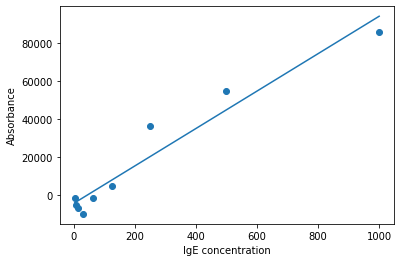

In [ ]:
# Test new IgE curve
ige = combine_ige.mean(axis=0) - combine_pbs.mean(axis=0)

ige_level = np.array([1000.0 / 2**i for i in range(9)])
x = ige_level

# Plot scatterplot
plt.scatter(ige_level, ige)

# Add trendline
degree = 1
# m, b = np.polyfit(ige_level, ige, degree)
m, b, r, p_value, se = stats.linregress(ige_level, ige)
plt.plot(x, m*x + b)

plt.xlabel("IgE concentration")
plt.ylabel("Absorbance")

# Print equation and R2
print(f"Equation: y = {m}*x + {b}")
print(f"R2: {r ** 2}")

Equation: y = 0.009568509913284012*x + 55.1367353853951
R2: 0.9404522786686406


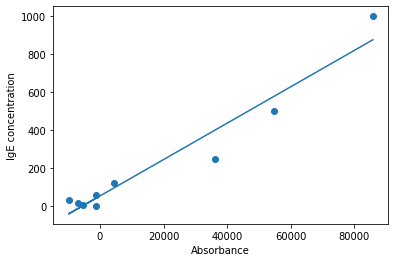

In [ ]:
# Plot curve to get x in terms of y
# Plot scatterplot
plt.scatter(ige, ige_level)

# Add trendline
degree = 1
# m, b = np.polyfit(ige, ige_level, degree)
m, b, r, p_value, se = stats.linregress(ige, ige_level)
plt.plot(ige, m*ige + b)

plt.ylabel("IgE concentration")
plt.xlabel("Absorbance")

# Print equation and R2
print(f"Equation: y = {m}*x + {b}")
print(f"R2: {r ** 2}")

## 2. Scale each membrane up to the average PBS value

In [ ]:
# Choose panel/batch/all
avg_pbs = combine_pbs.mean(axis=0)

# Scale them up by panel (since their number of allergens are different)
# For panel 1
for index, row in panel1.iterrows():
    panel_pbs = row[6]
    scalar = avg_pbs / panel_pbs
    panel1.iloc[index,3:] *= scalar
    # print(panel1.iloc[index,:])

# Check new PBS values
for index, row in panel1.iterrows():
    print(row[6])

# For panel 2
for index, row in panel2.iterrows():
    panel_pbs = row[6]
    scalar = avg_pbs / panel_pbs
    panel2.iloc[index,3:] *= scalar
    # print(panel2.iloc[index,:])

# Check new PBS values
for index, row in panel2.iterrows():
    print(row[6])

385293.05
385293.05
385293.05
385293.05
385293.04999999993
385293.05
385293.05
385293.04999999993
385293.05000000005
385293.05
385293.05000000005
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.04999999993
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05000000005
385293.05
385293.04999999993
385293.05
385293.05
385293.05
385293.04999999993
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05000000005
385293.05
385293.05
385293.05000000005
385293.05
385293.05
385293.04999999993
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05
385293.05


In [ ]:
panel1


,ID,Panel,Batch,0,1,2,3,4,5,6,...,126,127,128,129,130,131,132,133,134,135
0,30,1,150222-CSV,383479.396107,380397.574262,387137.973788,385293.05,363913.475543,365148.983828,486548.443504,...,378941.092055,375304.055857,367918.106726,368232.890333,368917.353584,370647.621091,370175.793124,372336.195405,378616.580036,379541.474033
1,5,1,150222-CSV,393611.339351,387186.335236,385622.854205,385293.05,350029.662032,345104.459174,485901.391058,...,409806.911853,396172.786997,389588.108224,385915.591079,388985.526477,385163.789562,385860.465304,384137.309615,385892.780414,382831.399015
2,2,1,150222-CSV,626720.462949,486662.969852,381563.148796,385293.05,343880.846321,345187.203116,461452.957835,...,403684.057823,367689.421746,370711.176545,366248.368572,359291.696756,364506.229374,366094.854316,365934.407159,388315.795214,375137.339180
3,168,1,150222-CSV,419279.837920,395019.888928,380816.108203,385293.05,375087.714913,367056.922088,568353.669658,...,417662.249690,387713.620651,379295.381544,370876.173820,365846.152455,359884.322779,359661.541167,363816.902549,386552.250419,374884.305615
4,61,1,150222-CSV,387304.503836,380834.288484,384162.626929,385293.05,365518.221253,366177.246249,482952.280282,...,379316.957722,369424.590464,367602.511627,364425.673181,369156.552004,369040.596235,372971.438523,373673.000058,379173.032723,379730.086566
5,14,1,150222-CSV,372811.925235,374127.876089,384793.949676,385293.05,359248.383101,353906.046301,415724.219745,...,392972.271649,386610.034188,384789.299673,381103.397282,382307.231396,380234.363384,380364.046802,379454.712878,382367.164768,383010.931853
6,220,1,150222-CSV,513884.009100,442878.760613,382316.649997,385293.05,349245.334588,352528.750527,524459.513125,...,403513.618515,385225.947715,386492.618253,377960.516701,380746.640360,381846.933999,375631.240109,374508.885444,376446.578837,377875.949438
7,142,1,150222-CSV,381960.808213,379273.351305,384439.983169,385293.05,372261.551515,372480.072424,434261.942218,...,382741.394003,376837.826642,377206.429114,375738.485938,377004.613872,376368.451273,377513.058947,377249.001621,380956.043143,381769.770821
8,169,1,150222-CSV,393799.005345,383923.852053,383501.184278,385293.05,375497.730987,375063.315024,421890.792638,...,381871.390153,376728.353713,375951.638263,374985.883783,375176.791843,375473.967606,376781.220561,378718.336612,380753.710237,381753.908270
9,127,1,150222-CSV,387866.341095,359249.955240,378783.819513,385293.05,355822.501254,352117.270719,515405.129195,...,380563.132636,366752.236893,368340.964438,365990.666185,369955.154834,368265.347489,370087.870297,370925.057954,375751.425510,374824.732075


## 3. Minus each membrane by batch blank

In [ ]:
# Similarly, do by panel
subtracted1 = panel1.copy(deep=True).iloc[:,3:]
to_subtract1 = panel1.loc[panel1["ID"] == "B"].iloc[:,3:]
sub1 = pd.DataFrame(subtracted1.values - to_subtract1.values, columns=subtracted1.columns)

sub1

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,2721.220925,3900.321681,1415.398184,0.000000e+00,-1048.815088,1442.724770,61178.973758,27721.162720,20705.441692,1045.709368,...,-6379.138583,-6647.206265,-12614.755275,-10435.952145,-10854.808201,-10293.308116,-11720.034802,-9070.738682,-5436.889828,-4456.561636
1,12853.164169,10689.082656,-99.721399,0.000000e+00,-14932.628599,-18601.799883,60531.921312,12803.214451,-9468.450032,-33752.358197,...,24486.681215,14221.524876,9055.246223,7246.748601,9213.364692,4222.860356,3964.637378,2730.375528,1839.310549,-1166.636654
2,245962.287767,110165.717271,-4159.426808,0.000000e+00,-21081.444311,-18519.055942,36083.488089,18365.276290,-7389.554465,-35315.008767,...,18363.827186,-14261.840376,-9821.685456,-12420.473906,-20480.465029,-16434.699832,-15800.973610,-15472.526928,4262.325350,-8860.696489
3,38521.662738,18522.636347,-4906.467401,0.000000e+00,10125.424281,3350.663031,142984.199912,64264.957239,81538.811958,7474.302346,...,32342.019052,5762.358530,-1237.480457,-7792.668658,-13926.009330,-21056.606427,-22234.286759,-17590.031538,2498.780554,-9113.730054
4,6546.328654,4337.035903,-1559.948675,-5.820766e-11,555.930621,2470.987192,57582.810536,26649.625284,16353.110979,-4991.740108,...,-6003.272916,-12526.671658,-12930.350374,-14243.169297,-10615.609781,-11900.332971,-8924.389403,-7733.934029,-4880.437142,-4267.949103
5,-7946.249947,-2369.376492,-928.625928,0.000000e+00,-5713.907531,-9800.212757,-9645.250000,-872.641091,-32423.250037,-22675.980320,...,7652.041012,4658.772067,4256.437672,2434.554804,2535.069611,-706.565822,-1531.781124,-1952.221209,-1686.305096,-987.103816
6,133125.833919,66381.508032,-3405.925606,0.000000e+00,-15716.956043,-11177.508531,99090.043379,89795.232017,19946.744053,-8750.105241,...,18193.387877,3274.685593,5959.756252,-708.325776,974.478576,906.004793,-6264.587817,-6898.048643,-7606.891027,-6122.086231
7,1202.633032,2776.098725,-1282.592435,-5.820766e-11,7299.260883,8773.813367,8892.472472,22163.519756,1830.317994,-12659.933794,...,-2578.836635,-5113.435479,-3326.432887,-2930.356540,-2767.547913,-4572.477933,-4382.768979,-4157.932466,-3097.426721,-2228.264848
8,13040.830163,7426.599472,-2221.391326,5.820766e-11,10535.440356,11357.055966,-3478.677107,11584.933255,15527.668806,8600.043881,...,-3448.840485,-5222.908408,-4581.223738,-3682.958695,-4595.369942,-5466.961600,-5114.607365,-2688.597476,-3299.759627,-2244.127399
9,7108.165913,-17247.297340,-6938.756091,0.000000e+00,-9139.789377,-11588.988339,90035.659449,41107.277298,11118.024791,-28501.787712,...,-4757.098002,-15199.025228,-12191.897562,-12678.176292,-9817.006951,-12675.581718,-11807.957629,-10481.876133,-8302.044355,-9173.303594


In [ ]:
subtracted2 = panel2.copy(deep=True).iloc[:,3:]
to_subtract2 = panel2.loc[panel2["ID"] == "B"].iloc[:,3:]
sub2 = pd.DataFrame(subtracted2.values - to_subtract2.values, columns=subtracted2.columns)

sub2

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,95195.362265,5041.970548,-14444.824504,-5.820766e-11,1702.534465,-1456.909120,-12028.978625,2433.192362,19.726062,-5800.063906,...,-43610.655248,-45578.162948,-28144.325212,-43736.743242,-42203.959039,-26141.344446,33206.124976,-45320.349834,-29660.475567,-57071.787016
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-22759.643773,-26193.991331,-13931.844247,0.000000e+00,-953.512085,4531.815432,-113211.395588,-66540.480818,-68377.225380,-19413.916640,...,-75078.010366,-75012.190889,-62154.171503,-77814.629783,-81550.797277,-68497.503679,-67104.189273,-99850.426576,-106139.443299,-138855.044571
3,25107.749261,-14308.681103,-14930.320077,0.000000e+00,893.065928,7641.980283,-108944.631438,-75175.489447,-74206.320149,-39878.163889,...,-74684.463399,-71974.493691,-61000.351174,-77135.252045,-78209.463834,-73140.658148,-60720.922789,-100494.104236,-104449.032210,-136888.571303
4,-28530.068861,-20643.245136,-14339.425322,-5.820766e-11,-583.006163,3131.476721,-122272.663838,-91955.965451,-84998.838469,-36586.040048,...,-64039.381192,-68724.711312,-59501.572591,-68336.864780,-69891.304637,-68604.808614,-50721.296384,-93070.177637,-100808.036385,-125204.138310
5,-15001.512482,-6597.185860,-8644.871964,0.000000e+00,-4120.221595,-985.251159,-31964.670253,-13702.562814,-9959.761820,8844.727766,...,-30058.684739,-36110.777416,-22037.099436,-19706.504331,-12320.311076,1854.029349,36210.349605,-30334.600769,-11280.921348,-43166.929131
6,-23362.845572,-31409.690568,-16493.558054,0.000000e+00,-245.980452,4181.672900,-130762.643689,-70009.126497,-89493.774962,-30941.398074,...,-69076.457262,-64579.459354,-56451.154786,-71904.326723,-74463.128791,-63858.640718,-52562.451044,-97167.100021,-103470.738762,-130818.848906
7,118654.255189,-13136.440866,-13796.374796,0.000000e+00,10.956885,-1501.520770,-38511.496489,-36787.018414,-26175.895437,-22374.262562,...,-55679.536512,-53595.213779,-38023.210234,-49622.937292,-49383.266082,-31832.680528,26073.296743,-67229.632157,-68951.745201,-88837.486010
8,54868.766298,24227.947034,-1541.560079,0.000000e+00,1107.774873,-2326.296282,8018.554779,72292.606875,10667.954863,-25649.650740,...,-103584.110329,-122516.048965,-120182.336605,-127046.584043,-117781.741881,-77495.630396,-46278.420358,-93660.895457,-83965.947597,-91828.177687
9,-22291.997226,-23106.213973,-16782.092630,0.000000e+00,1118.350151,5018.109294,-107383.247169,-70190.909641,-76806.057999,-41859.606895,...,-67611.229890,-62459.342658,-42794.814207,-70583.914711,-73483.019463,-68167.639184,-51661.306624,-98871.385984,-95526.672991,-131545.728320


## 5. Approximate sIgE level from absorbance based on average IgE standard curve

Apply the equation: IU = m * absorbance + b

In [ ]:
# For simplicity, we will use the combined IgE curve
sige_1 = sub1.applymap(lambda x : m*x + b)
sige_1

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,81.174765,92.457002,68.679987,55.136735,45.101138,68.941462,640.528352,320.386956,253.256959,65.142616,...,-5.902115,-8.467124,-65.567676,-44.719776,-48.727604,-43.354885,-57.006534,-31.656718,3.113801,12.494081
1,178.122364,157.415329,54.182550,55.136735,-87.746269,-122.854771,634.337025,177.644420,-35.462223,-267.823039,...,289.437787,191.215537,141.781949,124.477321,143.294907,95.543217,93.072407,81.262361,72.736197,43.973761
2,2408.629324,1109.258493,15.337219,55.136735,-146.581273,-122.063035,400.401949,230.865064,-15.570290,-282.775276,...,230.851198,-81.327826,-38.842159,-63.708692,-140.830797,-102.118853,-96.055037,-92.912292,95.920838,-29.646927
3,423.731647,232.370765,8.189153,55.136735,152.021958,87.197588,1423.282470,670.056616,835.341666,126.654671,...,364.601665,110.273920,43.295891,-19.427492,-78.114423,-146.343612,-157.612258,-113.173656,79.046342,-32.068081
4,117.775346,96.635706,40.210351,55.136735,60.456163,78.780401,606.118429,310.133939,211.611640,7.373221,...,-2.305641,-64.724847,-68.587450,-81.149171,-46.438832,-58.731719,-30.256373,-18.865489,8.438224,14.298822
5,-20.897036,32.465333,46.251169,55.136735,0.463155,-38.636698,-37.153935,46.786860,-255.105454,-161.838607,...,128.355366,99.714242,95.864501,78.431797,79.393574,48.375953,40.479873,36.456887,39.001308,45.691623
6,1328.952597,690.308853,22.547102,55.136735,-95.251114,-51.815366,1003.280798,914.343303,245.997354,-28.588733,...,229.220348,86.470597,112.162722,48.359113,64.461043,63.805851,-4.806035,-10.867311,-17.649877,-3.442507
7,66.644141,81.699864,42.864237,55.136735,124.979786,139.089056,140.224446,267.208594,72.650151,-65.999967,...,30.461111,6.208777,23.307729,27.097590,28.655426,11.384935,13.200167,15.351517,25.498977,33.815561
8,179.918048,126.198226,33.881330,55.136735,155.945201,163.806838,21.850979,165.987284,203.713388,137.426341,...,22.136471,5.161285,11.301251,19.896309,11.165893,2.826059,6.197564,29.410864,23.562953,33.663780
9,123.151291,-109.894200,-11.256821,55.136735,-32.317430,-55.752614,916.643835,448.472126,161.519666,-217.582903,...,9.618396,-90.295288,-61.521557,-66.174520,-38.797393,-66.149694,-57.847824,-45.159200,-24.301458,-32.638111


In [ ]:
sige_2 = sub2.applymap(lambda x : m*x + b)
sige_2

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,966.014503,103.380881,-83.078711,55.136735,71.427453,41.196286,-59.962666,78.418761,55.325484,-0.361234,...,-362.152252,-380.978369,-214.162519,-363.358726,-348.692265,-194.996978,372.869871,-378.511481,-228.669819,-490.955224
1,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,...,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735,55.136735
2,-162.639142,-195.500730,-78.170254,55.136735,46.013046,98.499456,-1028.127626,-581.556515,-599.131424,-130.625518,...,-663.247951,-662.618157,-539.586071,-689.433321,-725.182877,-600.282308,-586.950365,-900.283061,-960.459580,-1273.499135
3,295.380483,-81.776022,-87.724180,55.136735,63.682046,128.259099,-987.301051,-664.180681,-654.907175,-326.437871,...,-659.482293,-633.551921,-528.545730,-682.932688,-693.211295,-644.710377,-525.872016,-906.442097,-944.284865,-1254.682916
4,-217.853511,-142.388360,-82.070198,55.136735,49.558235,85.100301,-1114.830461,-824.744832,-758.175493,-294.937152,...,-557.624718,-602.456346,-514.204652,-598.745233,-613.618906,-601.309056,-430.190492,-835.406182,-909.445960,-1142.880303
5,-88.405386,-7.988503,-27.581808,55.136735,15.712354,45.709350,-250.717529,-75.976373,-40.163344,139.767601,...,-232.480088,-290.389596,-155.725469,-133.425147,-62.750283,72.877034,401.615825,-235.120193,-52.804872,-357.906454
6,-168.410884,-245.407200,-102.682038,55.136735,52.783069,95.149114,-1196.066917,-614.746286,-801.185338,-240.926339,...,-605.822031,-562.792462,-485.016699,-632.880528,-657.364451,-555.895301,-447.807598,-874.607624,-934.924054,-1196.604717
7,1190.481152,-70.559429,-76.874014,55.136735,55.241576,40.769419,-313.360901,-296.860215,-195.327580,-158.951618,...,-477.633462,-457.689599,-308.688729,-419.680832,-417.387536,-249.454584,304.619334,-588.150666,-604.628722,-794.905630
8,580.149070,286.962087,40.386302,55.136735,65.736490,32.877546,131.862356,746.869261,157.213167,-190.292202,...,-936.008851,-1117.159294,-1094.829144,-1160.509763,-1071.859029,-686.380972,-387.678789,-841.058471,-748.292267,-823.522093
9,-158.164461,-165.955302,-105.442884,55.136735,65.837680,103.152564,-972.360930,-616.485679,-679.782792,-345.397328,...,-591.801988,-542.506104,-354.345869,-620.246152,-647.986265,-597.125996,-439.184989,-890.915102,-858.911182,-1203.559870


## 6. Add them all together to create the final dataset

- Sort by id
- Compare the IU for the controls (just to see)
- Add the allergens from panel 2 to panel 1 by index
- Add in the names
- Export

Sort by id

In [ ]:
final_1 = sige_1.copy(deep=True)
final_2 = sige_2.copy(deep=True)

# Add back batch, panel, ID
final_1.insert(0, "Batch", panel1["Batch"])
final_1.insert(0, "Panel", panel1["Panel"])
final_1.insert(0, "ID", panel1["ID"])
final_2.insert(0, "Batch", panel2["Batch"])
final_2.insert(0, "Panel", panel2["Panel"])
final_2.insert(0, "ID", panel2["ID"])

# Remove blank
final_1 = final_1[final_1["ID"] != "B"]
final_2 = final_2[final_2["ID"] != "B"]

# Change ID type to int
final_1["ID"] = pd.to_numeric(final_1["ID"])
final_2["ID"] = pd.to_numeric(final_2["ID"])

# Sort by ID
final_1 = final_1.sort_values("ID").reset_index(drop=True)
final_2 = final_2.sort_values("ID").reset_index(drop=True)

final_1

,ID,Panel,Batch,0,1,2,3,4,5,6,...,126,127,128,129,130,131,132,133,134,135
0,1,1,150222-CSV,262.100484,123.480011,38.680988,55.136735,-27.307185,-71.089185,245.697277,...,194.482160,156.179550,142.444229,146.037079,119.667533,125.112675,92.762771,119.161043,89.073684,38.351484
1,2,1,150222-CSV,2408.629324,1109.258493,15.337219,55.136735,-146.581273,-122.063035,400.401949,...,230.851198,-81.327826,-38.842159,-63.708692,-140.830797,-102.118853,-96.055037,-92.912292,95.920838,-29.646927
2,4,1,150222-CSV,174.246343,58.988298,29.712120,55.136735,-153.676076,-210.259707,736.326658,...,206.698252,-4.048979,-65.207228,-137.438271,-140.858297,-167.174449,-149.748531,-136.645553,-109.712534,-72.884881
3,5,1,150222-CSV,178.122364,157.415329,54.182550,55.136735,-87.746269,-122.854771,634.337025,...,289.437787,191.215537,141.781949,124.477321,143.294907,95.543217,93.072407,81.262361,72.736197,43.973761
4,8,1,150222-CSV,536.821623,395.181875,21.895485,55.136735,145.110665,144.157095,-46.743865,...,121.889371,55.304379,35.940460,34.016588,25.062089,10.118557,-4.421149,-7.747398,9.258859,17.500516
5,10,1,150222-CSV,69.482757,91.322787,38.073595,55.136735,107.335071,108.052809,155.259107,...,53.406728,27.933143,9.667979,12.171572,8.857887,-5.660430,-8.484339,21.305646,7.975336,18.489382
6,14,1,150222-CSV,-20.897036,32.465333,46.251169,55.136735,0.463155,-38.636698,-37.153935,...,128.355366,99.714242,95.864501,78.431797,79.393574,48.375953,40.479873,36.456887,39.001308,45.691623
7,15,1,150222-CSV,88.823616,14.421392,49.469125,55.136735,104.303436,99.344248,104.654851,...,33.575407,18.926871,47.370619,64.110356,69.533979,55.129468,55.303393,55.292283,54.042561,48.608249
8,27,1,150222-CSV,194.172604,114.552140,92.733137,55.136735,71.143481,48.430730,361.512737,...,56.010713,30.363277,39.021011,28.754069,47.004033,16.205132,34.446038,51.298293,40.437983,41.020189
9,30,1,150222-CSV,81.174765,92.457002,68.679987,55.136735,45.101138,68.941462,640.528352,...,-5.902115,-8.467124,-65.567676,-44.719776,-48.727604,-43.354885,-57.006534,-31.656718,3.113801,12.494081


Compare controls

In [ ]:
# Compare all common controls, except IgE, 
# which is the first 25 allergens, minus IgE (9) - 3 to 27

# For each id
for idx in final_1["ID"]:
    print(f"ID: {idx}")
    for i in range(22):
        index = i+3 # Skip first 3 columns
        p1 = final_1.iloc[:,index].loc[final_1["ID"] == idx]
        p2 = final_2.iloc[:,index].loc[final_2["ID"] == idx]
        
        print(f"  {p1.to_string()} VS {p2.to_string()}")

ID: 1
  0    262.100484 VS 0   -218.324868
  0    123.480011 VS 0   -172.362499
  0    38.680988 VS 0   -99.627898
  0    55.136735 VS 0    55.136735
  0   -27.307185 VS 0    73.338698
  0   -71.089185 VS 0    131.312542
  0    245.697277 VS 0   -929.879126
  0    173.084262 VS 0   -614.941165
  0    50.88361 VS 0   -738.696929
  0   -45.936101 VS 0   -271.44843
  0   -143.102931 VS 0   -499.414474
  0   -232.324269 VS 0   -321.787616
  0   -262.625996 VS 0   -383.21512
  0   -330.578143 VS 0   -457.922399
  0   -380.566515 VS 0   -519.500219
  0   -288.648078 VS 0   -504.98851
  0   -327.268529 VS 0   -630.586377
  0   -210.518786 VS 0   -703.06619
  0    187.323902 VS 0   -121.482367
  0    141.656791 VS 0    245.640258
  0    99.270652 VS 0    150.107212
  0    63.006105 VS 0    359.979426
ID: 2
  1    2408.629324 VS 1    492.494715
  1    1109.258493 VS 1   -82.243666
  1    15.337219 VS 1   -100.47393
  1    55.136735 VS 1    55.136735
  1   -146.581273 VS 1    58.812015
  1   -12

<AxesSubplot:xlabel='Control', ylabel='sIgE'>

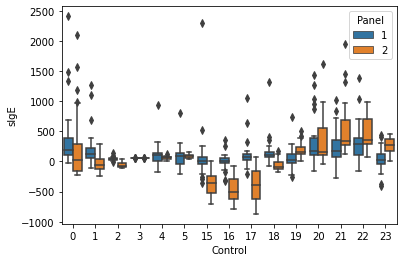

In [ ]:
# Visualise the group difference with boxplot
# See if combined or separate IgE curve is better
import seaborn as sns

control_df = pd.concat([final_1, final_2]).iloc[:,:27]
# Remove IgE standards - 9 to 17
control_df.drop(control_df.columns[9:18], axis=1, inplace=True)
# Drop ID and Batch for simplicity
control_df.drop(columns=["ID", "Batch"], inplace=True)
control_long = pd.melt(control_df, "Panel", 
                       var_name="Control", value_name="sIgE")

sns.boxplot(x="Control", y="sIgE", hue="Panel", 
            data=control_long)

Some seem to be quite different. 15, 16, and 17 are generally lower in panel 2 (though they will just get fixed to 0 if negative). 21, 22 and 23 seem to be slight higher in panel 2 too.

Now we add allergens from panel 2 to 1

DISCLAIMER: This is a raw add. There is no adjusting of values or anything

In [ ]:
# Add the 28th sample ownwards (index 27, 30 in df)
final_df = pd.concat([final_1, final_2.iloc[:,30:]], axis=1)
final_df

,ID,Panel,Batch,0,1,2,3,4,5,6,...,124,125,126,127,128,129,130,131,132,133
0,1,1,150222-CSV,262.100484,123.480011,38.680988,55.136735,-27.307185,-71.089185,245.697277,...,-586.803171,-612.828855,-505.939869,-618.753050,-645.601219,-581.573039,-397.396536,-854.627178,-903.165655,-1181.757539
1,2,1,150222-CSV,2408.629324,1109.258493,15.337219,55.136735,-146.581273,-122.063035,400.401949,...,-588.487272,-635.414482,-510.692730,-654.073525,-667.882819,-675.662728,-574.355543,-903.583218,-934.704244,-1235.519446
2,4,1,150222-CSV,174.246343,58.988298,29.712120,55.136735,-153.676076,-210.259707,736.326658,...,-557.624718,-602.456346,-514.204652,-598.745233,-613.618906,-601.309056,-430.190492,-835.406182,-909.445960,-1142.880303
3,5,1,150222-CSV,178.122364,157.415329,54.182550,55.136735,-87.746269,-122.854771,634.337025,...,-469.040638,-442.364015,-284.437220,-370.903417,-310.530701,-102.233516,511.873855,-451.215199,-451.599106,-658.921856
4,8,1,150222-CSV,536.821623,395.181875,21.895485,55.136735,145.110665,144.157095,-46.743865,...,-309.759912,-203.312518,-0.392866,-214.157032,-232.312016,54.077160,654.734362,-352.692951,18.395831,-486.928603
5,10,1,150222-CSV,69.482757,91.322787,38.073595,55.136735,107.335071,108.052809,155.259107,...,-232.480088,-290.389596,-155.725469,-133.425147,-62.750283,72.877034,401.615825,-235.120193,-52.804872,-357.906454
6,14,1,150222-CSV,-20.897036,32.465333,46.251169,55.136735,0.463155,-38.636698,-37.153935,...,-220.931348,-231.489769,-74.772945,-202.672578,-153.905546,-76.250875,241.626423,-311.077934,-298.813175,-490.480310
7,15,1,150222-CSV,88.823616,14.421392,49.469125,55.136735,104.303436,99.344248,104.654851,...,-235.338041,-311.669704,-158.971287,-255.356351,-199.926812,-17.079002,516.746398,-302.224355,-307.095525,-522.384698
8,27,1,150222-CSV,194.172604,114.552140,92.733137,55.136735,71.143481,48.430730,361.512737,...,-345.860897,-445.915601,-292.001942,-363.916813,-351.833548,-234.143947,85.518267,-543.636994,-532.223708,-745.056143
9,30,1,150222-CSV,81.174765,92.457002,68.679987,55.136735,45.101138,68.941462,640.528352,...,-187.746412,-135.210759,-98.346720,-90.518471,-99.113370,94.809929,301.218033,-249.083528,-186.736409,-440.037005


Change header to the correct allergens

In [ ]:
panel = pd.read_excel("Panel.xlsx")

final_df2 = final_df.set_axis(panel.columns, axis=1, inplace=False)

final_df2

,ID,Panel,Batch,BSA,BB (with Urea),BB (without Urea),PBS,PBS + Glycerol,pET32 (a) vector,IgE 1000,...,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #,BSF-D M<P,BSF-WT OKA,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,NC10
0,1,1,150222-CSV,262.100484,123.480011,38.680988,55.136735,-27.307185,-71.089185,245.697277,...,-586.803171,-612.828855,-505.939869,-618.753050,-645.601219,-581.573039,-397.396536,-854.627178,-903.165655,-1181.757539
1,2,1,150222-CSV,2408.629324,1109.258493,15.337219,55.136735,-146.581273,-122.063035,400.401949,...,-588.487272,-635.414482,-510.692730,-654.073525,-667.882819,-675.662728,-574.355543,-903.583218,-934.704244,-1235.519446
2,4,1,150222-CSV,174.246343,58.988298,29.712120,55.136735,-153.676076,-210.259707,736.326658,...,-557.624718,-602.456346,-514.204652,-598.745233,-613.618906,-601.309056,-430.190492,-835.406182,-909.445960,-1142.880303
3,5,1,150222-CSV,178.122364,157.415329,54.182550,55.136735,-87.746269,-122.854771,634.337025,...,-469.040638,-442.364015,-284.437220,-370.903417,-310.530701,-102.233516,511.873855,-451.215199,-451.599106,-658.921856
4,8,1,150222-CSV,536.821623,395.181875,21.895485,55.136735,145.110665,144.157095,-46.743865,...,-309.759912,-203.312518,-0.392866,-214.157032,-232.312016,54.077160,654.734362,-352.692951,18.395831,-486.928603
5,10,1,150222-CSV,69.482757,91.322787,38.073595,55.136735,107.335071,108.052809,155.259107,...,-232.480088,-290.389596,-155.725469,-133.425147,-62.750283,72.877034,401.615825,-235.120193,-52.804872,-357.906454
6,14,1,150222-CSV,-20.897036,32.465333,46.251169,55.136735,0.463155,-38.636698,-37.153935,...,-220.931348,-231.489769,-74.772945,-202.672578,-153.905546,-76.250875,241.626423,-311.077934,-298.813175,-490.480310
7,15,1,150222-CSV,88.823616,14.421392,49.469125,55.136735,104.303436,99.344248,104.654851,...,-235.338041,-311.669704,-158.971287,-255.356351,-199.926812,-17.079002,516.746398,-302.224355,-307.095525,-522.384698
8,27,1,150222-CSV,194.172604,114.552140,92.733137,55.136735,71.143481,48.430730,361.512737,...,-345.860897,-445.915601,-292.001942,-363.916813,-351.833548,-234.143947,85.518267,-543.636994,-532.223708,-745.056143
9,30,1,150222-CSV,81.174765,92.457002,68.679987,55.136735,45.101138,68.941462,640.528352,...,-187.746412,-135.210759,-98.346720,-90.518471,-99.113370,94.809929,301.218033,-249.083528,-186.736409,-440.037005


Force values above 1000 to 1000, and values below 0 to 0

In [ ]:
# Alter the values
for column in final_df2:
    if column in ["ID", "Batch", "Panel"]:
        continue
    # If below 0, set to 0
    final_df2.loc[final_df2[column] < 0, column] = 0
    # If above 1000, set to 1000
    final_df2.loc[final_df2[column] > 1000, column] = 1000

final_df2

,ID,Panel,Batch,BSA,BB (with Urea),BB (without Urea),PBS,PBS + Glycerol,pET32 (a) vector,IgE 1000,...,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #,BSF-D M<P,BSF-WT OKA,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,NC10
0,1,1,150222-CSV,262.100484,123.480011,38.680988,55.136735,0.000000,0.000000,245.697277,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,2,1,150222-CSV,1000.000000,1000.000000,15.337219,55.136735,0.000000,0.000000,400.401949,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,4,1,150222-CSV,174.246343,58.988298,29.712120,55.136735,0.000000,0.000000,736.326658,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,5,1,150222-CSV,178.122364,157.415329,54.182550,55.136735,0.000000,0.000000,634.337025,...,0.0,0.0,0.0,0.0,0.0,0.000000,511.873855,0.0,0.000000,0.0
4,8,1,150222-CSV,536.821623,395.181875,21.895485,55.136735,145.110665,144.157095,0.000000,...,0.0,0.0,0.0,0.0,0.0,54.077160,654.734362,0.0,18.395831,0.0
5,10,1,150222-CSV,69.482757,91.322787,38.073595,55.136735,107.335071,108.052809,155.259107,...,0.0,0.0,0.0,0.0,0.0,72.877034,401.615825,0.0,0.000000,0.0
6,14,1,150222-CSV,0.000000,32.465333,46.251169,55.136735,0.463155,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,241.626423,0.0,0.000000,0.0
7,15,1,150222-CSV,88.823616,14.421392,49.469125,55.136735,104.303436,99.344248,104.654851,...,0.0,0.0,0.0,0.0,0.0,0.000000,516.746398,0.0,0.000000,0.0
8,27,1,150222-CSV,194.172604,114.552140,92.733137,55.136735,71.143481,48.430730,361.512737,...,0.0,0.0,0.0,0.0,0.0,0.000000,85.518267,0.0,0.000000,0.0
9,30,1,150222-CSV,81.174765,92.457002,68.679987,55.136735,45.101138,68.941462,640.528352,...,0.0,0.0,0.0,0.0,0.0,94.809929,301.218033,0.0,0.000000,0.0


In [ ]:
# Export the final dataframe
final_df2.to_csv("150222_batch.csv")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=72487218-bfd4-4a63-a450-c076490888ed' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>